# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data from the csv file using read_csv() method
df = pd.read_csv('Churn_Modelling.csv')

# Exploratory data analysis

In [4]:
# Checking any 5 random rows from the dataframe
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8714,8715,15737408,L?,703,France,Female,41,6,109941.51,1,1,0,116267.28,0
2845,2846,15812513,Nnaife,599,Germany,Male,45,10,103583.05,1,1,0,132127.69,1
3090,3091,15779581,Bottrill,734,Spain,Female,43,3,55853.33,2,0,1,94811.85,1
3080,3081,15694288,Cawthorne,468,Spain,Male,28,3,0.00,2,1,0,170661.02,0
5392,5393,15710012,Bowen,738,Spain,Male,44,2,0.00,2,1,0,43018.82,1


In [5]:
# Checking the shape of the dataframe
df.shape

(10000, 14)

In [17]:
# Checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int32  
 1   CustomerId       10000 non-null  int32  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int32  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int32  
 7   Tenure           10000 non-null  int32  
 8   Balance          10000 non-null  float32
 9   NumOfProducts    10000 non-null  int32  
 10  HasCrCard        10000 non-null  int32  
 11  IsActiveMember   10000 non-null  int32  
 12  EstimatedSalary  10000 non-null  float32
 13  Exited           10000 non-null  int32  
dtypes: float32(2), int32(9), object(3)
memory usage: 664.2+ KB


In [16]:
# Optimizing the memory occupied by using the appropriate datatypes

temp_int = df.select_dtypes(include=np.int64)
temp_int = temp_int.columns
df[temp_int] = df[temp_int].astype(np.int32)

temp_float = df.select_dtypes(include=np.float64)
temp_float = temp_float.columns
df[temp_float] = df[temp_float].astype(np.float32)

In [14]:
# Let's get some descriptive information about our dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
# Let's check the percentage of null values
df.isnull().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [20]:
# Let's check if there are any duplicated values
df.duplicated().sum()

0

In [22]:
# Let's drop some unnecessary features from the dataframe
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

# Understanding data through visualizations

1. Are there any outliers?
2. Out of Male or Female, who exited more?
3. Relation between credi score and balance
4. Relation between credit score and estimated salary
5. How many active members exited

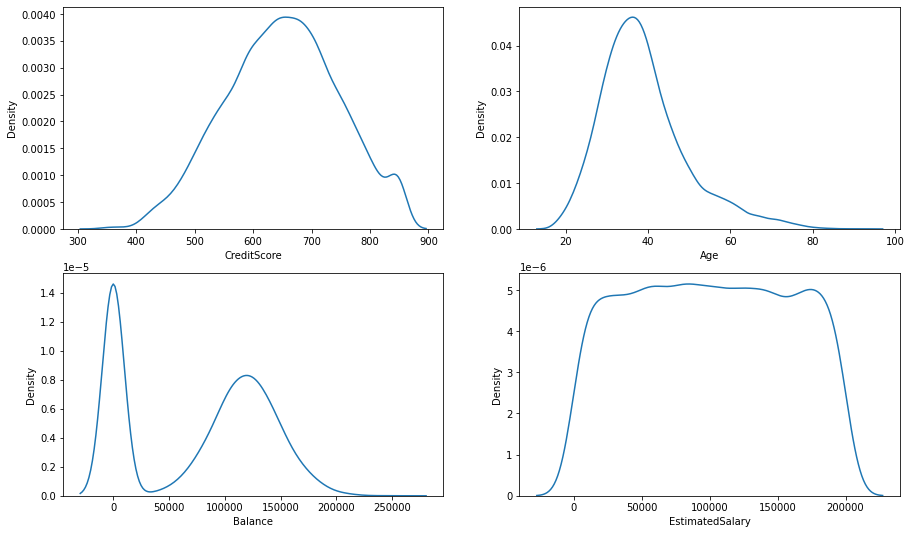

In [54]:
# Let's check the shape of distributions
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

sns.kdeplot(df['CreditScore'], ax=ax[0][0])
sns.kdeplot(df['Age'], ax=ax[0][1])
sns.kdeplot(df['Balance'], ax=ax[1][0])
sns.kdeplot(df['EstimatedSalary'], ax=ax[1][1])

plt.show()

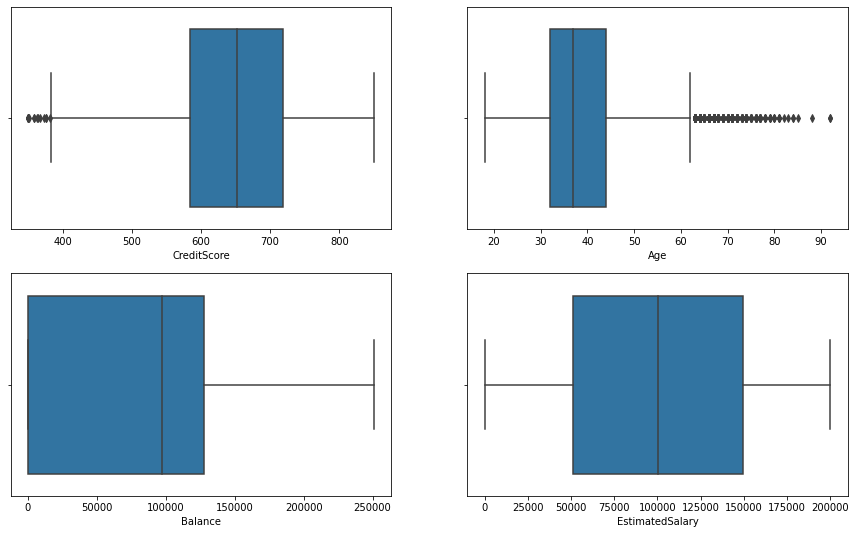

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

sns.boxplot(x = df['CreditScore'], ax=ax[0][0])
sns.boxplot(x = df['Age'], ax=ax[0][1])
sns.boxplot(x = df['Balance'], ax=ax[1][0])
sns.boxplot(x = df['EstimatedSalary'], ax=ax[1][1])

plt.show()


In [23]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000000,1,1,1,101348.882812,1
1,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0
2,502,France,Female,42,8,159660.796875,3,1,0,113931.570312,1
3,699,France,Female,39,1,0.000000,2,0,0,93826.632812,0


[Text(0.5, 1.0, 'Tenure comparsion regarding exits')]

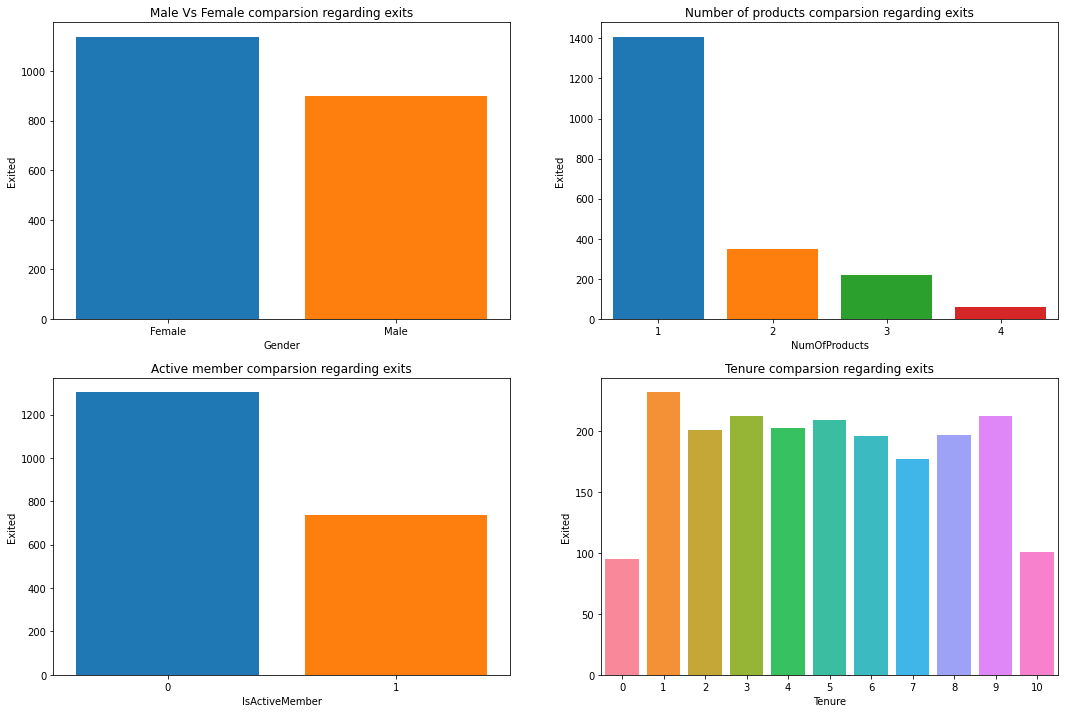

In [31]:
# Let's plot barplots to find out answer to the questions
fig,ax = plt.subplots(2,2,figsize =(18,12))

temp1 = df.groupby('Gender')['Exited'].sum()
temp2 = df.groupby('NumOfProducts')['Exited'].sum()
temp3 = df.groupby('IsActiveMember')['Exited'].sum()
temp4 = df.groupby('Tenure')['Exited'].sum()

sns.barplot(x = temp1.index , y = temp1,saturation=2,ax = ax[0][0]).set(title='Male Vs Female comparsion regarding exits')
sns.barplot(x = temp2.index , y = temp2,saturation=2,ax = ax[0][1]).set(title='Number of products comparsion regarding exits')
sns.barplot(x = temp3.index , y = temp3,saturation=2,ax = ax[1][0]).set(title='Active member comparsion regarding exits')
sns.barplot(x = temp4.index , y = temp4,saturation=2,ax = ax[1][1]).set(title='Tenure comparsion regarding exits')